In [1]:
from sportsdataverse import wbb
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np

#w = wbb.espn_wbb_pbp(401414529)
s = wbb.load_wbb_schedule(2023)
teams = wbb.wbb_teams.espn_wbb_teams(2023)



s.home_id = s.home_id.astype(str)
s.away_id = s.away_id.astype(str)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


In [2]:
pbp_season = wbb.load_wbb_pbp(2023)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
100%|██████████| 1/1 [00:13<00:00, 13.61s/it]


In [3]:
s['date'] = pd.to_datetime(s['date'])
s['date'] = s['date'].dt.tz_convert('US/Eastern')
s.loc[s['date'].dt.date == date(2022,11,13),['home_short_display_name','away_short_display_name']]
#s.columns



,home_short_display_name,away_short_display_name
5436,Utah,SE Louisiana
5437,Arizona,CSU Northridge
5438,Elon,High Point
5439,North Alabama,La Verne
5440,E Kentucky,Morehead St
...,...,...
5499,Northwestern,Penn
5500,Miami,Boston Univ
5501,St Francis BK,Rider
5502,Lafayette,ETSU


In [27]:
r = requests.get('https://www.ncaa.com/scoreboard/basketball-women/d1/2023/03/10')
soup = BeautifulSoup(r.text,'html.parser')

for g in soup.find_all('a',class_='gamePod-link'):
    #print(g['href'].split('/')[-1])
    for h in g.find_all('span',class_='gamePod-game-team-name'):
        print(h.text,end=' ')
    print()

Missouri St. Drake 
Penn Princeton 
UAlbany Vermont 
Monmouth Drexel 
Grand Canyon Southern Utah 
UTEP Middle Tenn. 
Hawaii Long Beach St. 
TCU Oklahoma 
Southern U. Jackson St. 
Southern Ill. Belmont 
Harvard Columbia 
Stony Brook Northeastern 
UTSA Western Ky. 
Baylor Iowa St. 
UIC UNI 
Kent St. Toledo 
Siena Iona 
Ark.-Pine Bluff Alabama St. 
N.C. Central Norfolk St. 
West Virginia Oklahoma St. 
Hampton Towson 
Ball St. Bowling Green 
Murray St. Illinois St. 
Manhattan Niagara 
UMES Howard 
Kansas St. Texas 
Hofstra William & Mary 
CSU Bakersfield UC Santa Barbara 
California Baptist SFA 


In [143]:
team_data = {team:{'Drought':[], 'Opp_Drought':[]} for team in teams.team_id}
team_id_list = teams.team_id.to_list()

for game in tqdm(pbp_season.game_id.unique()):
    pbp = pbp_season[pbp_season.game_id == game]
    pbp = pbp[pbp.scoring_play]
    game_data = s[s.game_id == game]

    home_id = game_data.home_id.iloc[0]
    away_id = game_data.away_id.iloc[0]
    
    # If both teams are D1
    if (home_id in team_id_list) and (away_id in team_id_list):

        home_pbp = pbp[pbp.team_id==home_id].reset_index()
        away_pbp = pbp[pbp.team_id==away_id].reset_index()
        home_pbp['Drought'] = home_pbp['start_game_seconds_remaining'].diff() * -1
        away_pbp['Drought'] = away_pbp['start_game_seconds_remaining'].diff() * -1

        home_longest_drought = home_pbp.Drought.max()
        away_longest_drought = away_pbp.Drought.max()

        team_data[home_id]['Drought'].append(home_longest_drought)
        team_data[home_id]['Opp_Drought'].append(away_longest_drought)

        team_data[away_id]['Drought'].append(away_longest_drought)
        team_data[away_id]['Opp_Drought'].append(home_longest_drought)

100%|██████████| 5199/5199 [01:03<00:00, 81.56it/s] 


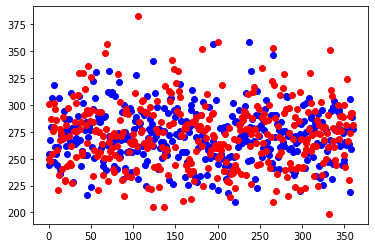

In [173]:
opp_drought = [sum(team['Opp_Drought'])/len(team['Opp_Drought']) for team in team_data.values()]
drought = [sum(team['Drought'])/len(team['Drought']) for team in team_data.values()]


plt.plot(opp_drought, 'bo');
plt.plot(drought, 'ro');

In [206]:
all_droughts = [d for team in team_data.values() for d in team['Drought']]
all_opp_droughts = [d for team in team_data.values() for d in team['Opp_Drought']]

print(f'Average Drought: {sum(all_droughts)/len(all_droughts):>16.6} \nAverage Opponent Drought: {sum(all_opp_droughts)/len(all_opp_droughts):.6}')

Average Drought:          270.896 
Average Opponent Drought: 270.896


In [19]:
years = wbb.load_wbb_team_boxscore(range(2012,2023))
years['game_date'] = pd.to_datetime(years.game_date)
years.total_turnovers = pd.to_numeric(years.total_turnovers)
years

  0%|          | 0/11 [00:00<?, ?it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
  9%|▉         | 1/11 [00:00<00:04,  2.48it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
 18%|█▊        | 2/11 [00:00<00:03,  2.90it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
 27%|██▋       | 3/11 [00:01<00:03,  2.02it/s]c:\Us

,game_id,season,season_type,game_date,team_id,team_uid,team_slug,team_location,team_name,team_abbreviation,...,opponent_team_slug,opponent_team_location,opponent_team_name,opponent_team_abbreviation,opponent_team_display_name,opponent_team_short_display_name,opponent_team_color,opponent_team_alternate_color,opponent_team_logo,team_rebounds
0,320772579,2012,3,2012-03-17,2199,s:40~l:54~t:2199,eastern-michigan-eagles,Eastern Michigan,Eagles,EMU,...,south-carolina-gamecocks,South Carolina,Gamecocks,SC,South Carolina Gamecocks,South Carolina,73000a,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/257...,NaN
1,320772579,2012,3,2012-03-17,2579,s:40~l:54~t:2579,south-carolina-gamecocks,South Carolina,Gamecocks,SC,...,eastern-michigan-eagles,Eastern Michigan,Eagles,EMU,Eastern Michigan Eagles,E Michigan,00331b,f0f0f0,https://a.espncdn.com/i/teamlogos/ncaa/500/219...,NaN
2,320652737,2012,2,2012-03-06,324,s:40~l:54~t:324,coastal-carolina-chanticleers,Coastal Carolina,Chanticleers,CCU,...,winthrop-eagles,Winthrop,Eagles,WIN,Winthrop Eagles,Winthrop,9e0b0e,fdb41e,https://a.espncdn.com/i/teamlogos/ncaa/500/273...,NaN
3,320652737,2012,2,2012-03-06,2737,s:40~l:54~t:2737,winthrop-eagles,Winthrop,Eagles,WIN,...,coastal-carolina-chanticleers,Coastal Carolina,Chanticleers,CCU,Coastal Carolina Chanticleers,Coast Carolina,007073,876447,https://a.espncdn.com/i/teamlogos/ncaa/500/324...,NaN
4,320610153,2012,2,2012-03-01,228,s:40~l:54~t:228,clemson-tigers,Clemson,Tigers,CLEM,...,north-carolina-tar-heels,North Carolina,Tar Heels,UNC,North Carolina Tar Heels,North Carolina,7bafd4,13294b,https://a.espncdn.com/i/teamlogos/ncaa/500/153...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71335,401380643,2022,2,2021-11-09,120,s:40~l:54~t:120,maryland-terrapins,Maryland,Terrapins,MD,...,longwood-lancers,Longwood,Lancers,LONG,Longwood Lancers,Longwood,003273,9ea2a3,https://a.espncdn.com/i/teamlogos/ncaa/500/234...,NaN
71336,401376678,2022,2,2021-11-09,2010,s:40~l:54~t:2010,alabama-am-bulldogs,Alabama A&M,Bulldogs,AAMU,...,dayton-flyers,Dayton,Flyers,DAY,Dayton Flyers,Dayton,004B8D,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/216...,NaN
71337,401376678,2022,2,2021-11-09,2168,s:40~l:54~t:2168,dayton-flyers,Dayton,Flyers,DAY,...,alabama-am-bulldogs,Alabama A&M,Bulldogs,AAMU,Alabama A&M Bulldogs,Alabama A&M,790000,ffffff,https://a.espncdn.com/i/teamlogos/ncaa/500/201...,NaN
71338,401375181,2022,2,2021-11-09,2427,s:40~l:54~t:2427,unc-asheville-bulldogs,UNC Asheville,Bulldogs,UNCA,...,unc-greensboro-spartans,UNC Greensboro,Spartans,UNCG,UNC Greensboro Spartans,UNC Greensboro,003559,ffd90a,https://a.espncdn.com/i/teamlogos/ncaa/500/243...,NaN


In [20]:
month = 3
last_games = []

fgcu_march = years.loc[(years.team_id==526) & (years.game_date.dt.month == month)].copy()
fgcu_nonmarch = years.loc[(years.team_id==526) & (years.game_date.dt.month != month)].copy()

print(fgcu_march.total_turnovers.mean(),fgcu_nonmarch.total_turnovers.mean())

for year in fgcu_march.game_date.dt.year.unique():
    year_df = fgcu_march.loc[fgcu_march.game_date.dt.year==year]
    last_games.append(fgcu_march[fgcu_march.game_date==year_df.game_date.max()].index[0])

last_games
fgcu_march=fgcu_march.drop(last_games)

10.91304347826087 11.793296089385475


In [113]:
wbb.load_wbb_player_boxscore(2023)

  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\cfinl\AppData\Local\Programs\Python\Python39\lib\site-packages\sportsdataverse\wbb\wbb_loaders.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(i_data)
100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


,game_id,season,season_type,game_date,athlete_id,athlete_display_name,team_id,team_name,team_short_display_name,minutes,...,active,athlete_jersey,athlete_short_name,athlete_headshot_href,athlete_position_name,athlete_position_abbreviation,team_logo,team_abbreviation,team_color,team_alternate_color
0,401516463,2023,2,2023-03-08,4595630,Kendyll Kinzer,36,Rams,Colorado St,31.0,...,False,0,K. Kinzer,https://a.espncdn.com/i/headshots/womens-colle...,Forward,F,https://a.espncdn.com/i/teamlogos/ncaa/500/36.png,CSU,004537,ffc425
1,401516463,2023,2,2023-03-08,4399658,Sydney Mech,36,Rams,Colorado St,38.0,...,False,24,S. Mech,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/36.png,CSU,004537,ffc425
2,401516463,2023,2,2023-03-08,4704574,Destiny Thurman,36,Rams,Colorado St,34.0,...,False,2,D. Thurman,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/36.png,CSU,004537,ffc425
3,401516463,2023,2,2023-03-08,4595160,McKenna Hofschild,36,Rams,Colorado St,39.0,...,False,4,M. Hofschild,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/36.png,CSU,004537,ffc425
4,401516463,2023,2,2023-03-08,4433341,Cailyn Crocker,36,Rams,Colorado St,26.0,...,False,32,C. Crocker,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/36.png,CSU,004537,ffc425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112703,401480218,2023,2,2022-11-07,5106228,Ale'Jah Douglas,228,Tigers,Clemson,23.0,...,False,24,A. Douglas,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/228...,CLEM,F66733,522d80
112704,401480218,2023,2,2022-11-07,5106227,Ruby Whitehorn,228,Tigers,Clemson,25.0,...,False,22,R. Whitehorn,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/228...,CLEM,F66733,522d80
112705,401480218,2023,2,2022-11-07,5106225,Taylor Thompson,228,Tigers,Clemson,1.0,...,False,1,T. Thompson,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/228...,CLEM,F66733,522d80
112706,401480218,2023,2,2022-11-07,4594897,Weronika Hipp,228,Tigers,Clemson,3.0,...,False,4,W. Hipp,https://a.espncdn.com/i/headshots/womens-colle...,Guard,G,https://a.espncdn.com/i/teamlogos/ncaa/500/228...,CLEM,F66733,522d80


In [66]:

a.head()

,id,sequence_number,type_id,type_text,text,away_score,home_score,period_number,period_display_value,clock_display_value,...,start_half_seconds_remaining,start_game_seconds_remaining,game_play_number,end_quarter_seconds_remaining,end_half_seconds_remaining,end_game_seconds_remaining,period,coordinate_x,coordinate_y,media_id
0,4.014868e+17,101905701,558,JumpShot,Tishara Morehouse missed Three Point Jumper.,0,0,1,1st Quarter,9:42,...,1182,2382,1,600.0,1200.0,2400.0,1,NaN,NaN,None
1,4.014868e+17,101906101,587,Defensive Rebound,Mihaela Lazic Defensive Rebound.,0,0,1,1st Quarter,9:38,...,1178,2378,2,582.0,1182.0,2382.0,1,NaN,NaN,None
2,4.014868e+17,101907201,598,Lost Ball Turnover,Kaliah Henderson Turnover.,0,0,1,1st Quarter,9:27,...,1167,2367,3,578.0,1178.0,2378.0,1,NaN,NaN,None
3,4.014868e+17,101907202,607,Steal,Tishara Morehouse Steal.,0,0,1,1st Quarter,9:27,...,1167,2367,4,567.0,1167.0,2367.0,1,NaN,NaN,None
4,4.014868e+17,101908001,558,JumpShot,Emma List made Three Point Jumper. Assisted by...,3,0,1,1st Quarter,9:19,...,1159,2359,5,567.0,1167.0,2367.0,1,NaN,NaN,None


In [114]:
def toc_to_sec(row):
    time_in_quarter = list(map(int, row.time.split(':')))

    time_remaining = 2400 - (row.quarter-1)*600 - (600-time_in_quarter[0]*60-time_in_quarter[1])
    return time_remaining

a = pbp_season[pbp_season.game_id==401486833].reset_index(drop=True)
df = pd.read_json('fgcu.json')
df['seconds_remaining'] = df.apply(toc_to_sec, axis=1)
df.iloc[395:]

,time,team,description,score,quarter,home_current_lineup,away_current_lineup,seconds_remaining
395,01:46,FGCU,Subbing out for FGCU-Uju Ezeudu,85-61,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",106
396,01:46,FGCU,Subbing in for FGCU-Kierra Adams,85-61,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",106
397,01:43,FIU,Personal Foul on FIU's Zaida Gonzalez (Seneca ...,85-61,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",103
398,01:19,FGCU,Layup by FGCU's Seneca Hackley,87-61,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",79
399,01:05,FIU,Layup by FIU's Maria Torres,87-63,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",65
400,00:46,FGCU,Jumper by FGCU's Seneca Hackley,90-63,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",46
401,00:37,FIU,Jumper MISSED by FIU's Mihaela Lazic,,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",37
402,00:21,FGCU,Layup by FGCU's Maddie Antenucci,92-63,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",21
403,00:00,FGCU,End of 4th Quarter.,92-63,4,"[MIHAELA LAZIC, OLIVIA TRICE, ZAIDA GONZALEZ, ...","[BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...",0


In [100]:
sub_times = df[df.description.str.contains('Subbing')].seconds_remaining
df.iloc[np.where(sub_times==t)[0][-1]]
sub_times[sub_times==t].index[-1]

396

In [116]:
df.loc[time_ix,['home_current_lineup','away_current_lineup']]

home_current_lineup    [SIFA JOYEUSE, MIHAELA LAZIC, TANAJAH HAYES, O...
away_current_lineup    [BRYLEE BARTRAM, SENECA HACKLEY, MADDIE ANTENU...
Name: 388, dtype: object

In [1]:
insert_subs = []
a[['home_current_lineup','away_current_lineup']] = None


for t in sub_times.unique():
    time_ix = sub_times[sub_times==t].index[0]-1
    lineups = df.loc[time_ix,['home_current_lineup','away_current_lineup']]
    loc = np.where(a.start_game_seconds_remaining>=t)[0][-1]
    a.iloc[loc, -2:] = lineups


a[['home_current_lineup','away_current_lineup']] = a[['home_current_lineup','away_current_lineup']].fillna(method='bfill')
a.head(36)

NameError: name 'a' is not defined